In [1]:
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

Using TensorFlow backend.


In [2]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

Text(0, 0.5, 'y')

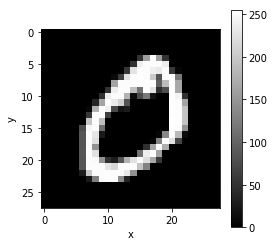

In [4]:
# Let's look at an example of data
plt.figure(figsize=(4,4))
p=plt.imshow(x_train[1],cmap='gray')
plt.colorbar(p)
plt.xlabel('x')
plt.ylabel('y')

In [5]:
from keras.utils import np_utils

In [6]:
# Restructure the correct labels to have the appropriate shape
Y_train = np_utils.to_categorical(y_train,10)
Y_test = np_utils.to_categorical(y_test,10)

In [7]:
# Reshape to 1D array and normalize to be between [0,1]
X_train = x_train.reshape([-1,28*28])/255.
X_test = x_test.reshape([-1,28*28])/255.

In [8]:
init = 'glorot_normal' # This is a useful way to randomly assign initial weights
# Build the network
model = Sequential()
model.add(Dense(15,input_shape = (28*28,),kernel_initializer=init,activation='tanh'))
model.add(Dense(15,kernel_initializer=init,activation='tanh'))
model.add(Dense(15,kernel_initializer=init,activation='tanh'))
model.add(Dense(15,kernel_initializer=init,activation='tanh'))
model.add(Dense(15,kernel_initializer=init,activation='tanh'))
model.add(Dense(10,kernel_initializer=init,activation='softmax'))

In [9]:
# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [10]:
# Check model looks good
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_3 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_4 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_5 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                160       
Total params: 12,895
Trainable params: 12,895
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Fit!
hist = model.fit(X_train,Y_train,batch_size=64,epochs=30,verbose=1,
                 validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 38us/step - loss: 1.4649 - acc: 0.5549 - val_loss: 1.0645 - val_acc: 0.7145
Epoch 2/30
60000/60000 [==============================] - 2s 40us/step - loss: 0.8561 - acc: 0.7989 - val_loss: 0.6587 - val_acc: 0.8553
Epoch 3/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.5494 - acc: 0.8750 - val_loss: 0.4521 - val_acc: 0.8952
Epoch 4/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.4081 - acc: 0.9006 - val_loss: 0.3674 - val_acc: 0.9082
Epoch 5/30
60000/60000 [==============================] - 3s 46us/step - loss: 0.3406 - acc: 0.9135 - val_loss: 0.3258 - val_acc: 0.9152
Epoch 6/30
60000/60000 [==============================] - 3s 43us/step - loss: 0.2997 - acc: 0.9225 - val_loss: 0.2906 - val_acc: 0.9222
Epoch 7/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.2725 - acc: 0.9284 - val_loss: 0.2742 - val_acc

In [12]:
plt.style.use("ggplot")

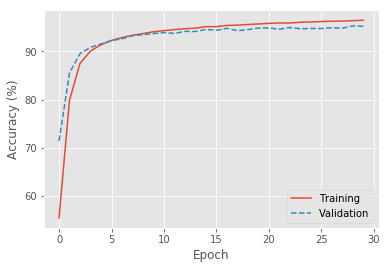

In [13]:
plt.figure()
plt.plot(np.array(hist.history['acc'])*100,label="Training")
plt.plot(np.array(hist.history['val_acc'])*100,label="Validation",ls="--")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend(loc=4)
plt.savefig("accuracy.png",dpi=300)